In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('S02-hw-dataset.csv')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [3]:
dataset.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [4]:
dataset.isna().sum()

user_id      0
age          2
country      0
purchases    0
revenue      0
dtype: int64

Есть пропуски у столбца age

In [5]:
print('Количество дубликатов:', dataset.duplicated().sum())

Количество дубликатов: 1


In [6]:
print('Количество неверных значений в столбце age:', dataset['age'].apply(lambda x: np.nan if x < 0 or x > 100 else x).isna().sum())
print('Покупки отрицательны:', dataset[dataset['purchases'] < 0].shape[0])
print('Прибыль отрицательна:', dataset[dataset['revenue'] < 0].shape[0])
print('user_id уникальные:', dataset['user_id'].nunique() == dataset.shape[0])

Количество неверных значений в столбце age: 3
Покупки отрицательны: 1
Прибыль отрицательна: 0
user_id уникальные: False


- Есть аномальные значения в столбце age, отрицательные или больше ста.
- Есть строка с отрицательным количеством покупок.
- user_id не уникален из-за дубликатов

In [7]:
dataset['country'].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

Больше всего покупок во Франкции и России

In [8]:
dataset['age'] = dataset['age'].apply(lambda x: np.nan if x < 0 or x > 100 else x)
dataset['purchases'] = dataset['purchases'].apply(lambda x: np.nan if x < 0 else x)
dataset['revenue'] = dataset['revenue'].apply(lambda x: np.nan if x < 0 else x)
dataset.dropna(inplace=True)
dataset.info()
dataset.describe()
dataset.isna().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    38 non-null     int64  
 1   age        38 non-null     float64
 2   country    38 non-null     object 
 3   purchases  38 non-null     float64
 4   revenue    38 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 1.8+ KB


user_id      0
age          0
country      0
purchases    0
revenue      0
dtype: int64

In [9]:
dataset

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7.0,749
1,2,24.0,RU,5.0,1115
2,3,52.0,FR,7.0,399
3,4,31.0,RU,6.0,654
6,7,46.0,RU,0.0,0
7,8,28.0,CN,2.0,456
8,9,39.0,US,4.0,980
9,10,24.0,RU,7.0,511
10,11,24.0,US,4.0,0
11,12,20.0,CN,7.0,1652


In [10]:
# revenue by country
for country, group in dataset.groupby('country'):
	print(country, group['revenue'].sum(), group['revenue'].mean())

CN 2108 1054.0
DE 7377 1475.4
FR 7326 666.0
RU 10271 790.0769230769231
US 3829 547.0


In [11]:
bins = [0, 14, 16, 18, 21, 30, 50, 90, 100]
labels = ['Young', 'Teen', 'Pubertatnay yazva', 'Young adult', 'Adult', 'Middle-aged', 'Senior', 'Old']
print(len(labels), len(bins))

8 9


In [12]:
dataset['age_group'] = pd.cut(dataset['age'], bins=bins, labels=labels)
dataset['age_group'].value_counts()

age_group
Middle-aged          17
Adult                11
Senior                6
Young adult           2
Young                 1
Pubertatnay yazva     1
Teen                  0
Old                   0
Name: count, dtype: int64

Большинство пользователей входят в категорию от 30 до 50 лет, следующия от 21 до 30.

In [13]:
for age, group in dataset.groupby('age_group'):
	print(age, group['revenue'].sum(), group['revenue'].mean())


Young 1488 1488.0
Teen 0 nan
Pubertatnay yazva 1104 1104.0
Young adult 2302 1151.0
Adult 5050 459.09090909090907
Middle-aged 17387 1022.7647058823529
Senior 3580 596.6666666666666
Old 0 nan


/tmp/ipykernel_59813/1350341420.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for age, group in dataset.groupby('age_group'):


Люди в возрасте от 21 до 30 приносят наибольшую прибыль

## Визуализация

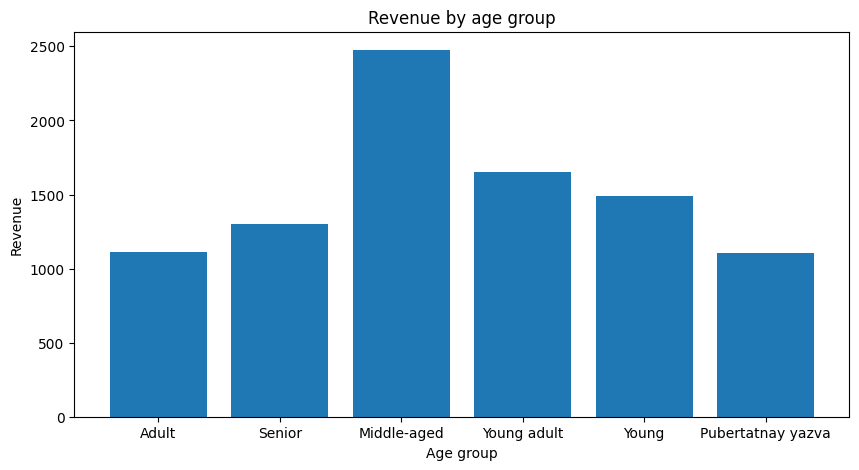

In [14]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.bar(dataset['age_group'], dataset['revenue'])
ax.set_title('Revenue by age group')
ax.set_xlabel('Age group')
ax.set_ylabel('Revenue')
plt.show()

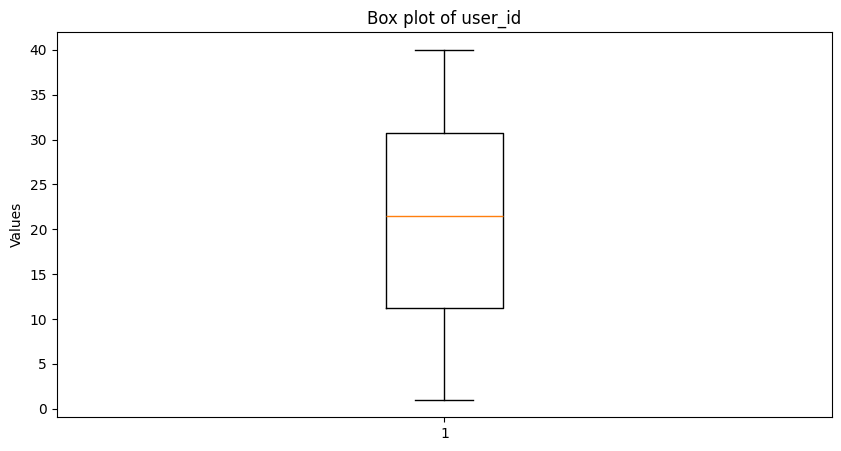

<Figure size 640x480 with 0 Axes>

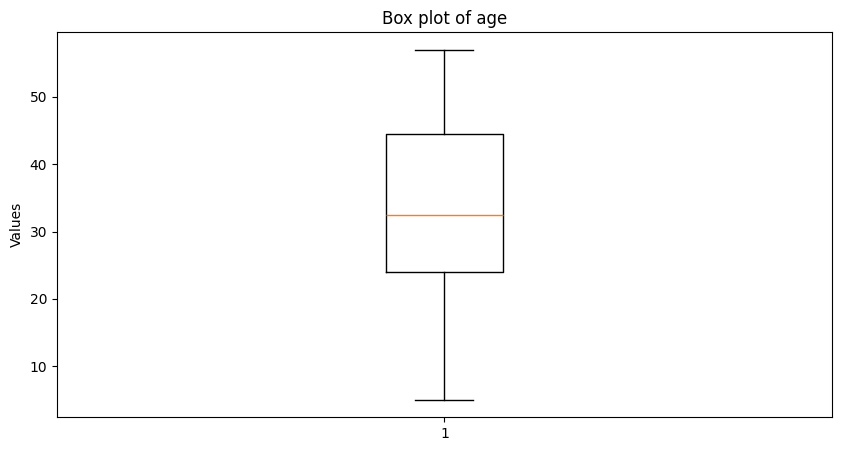

<Figure size 640x480 with 0 Axes>

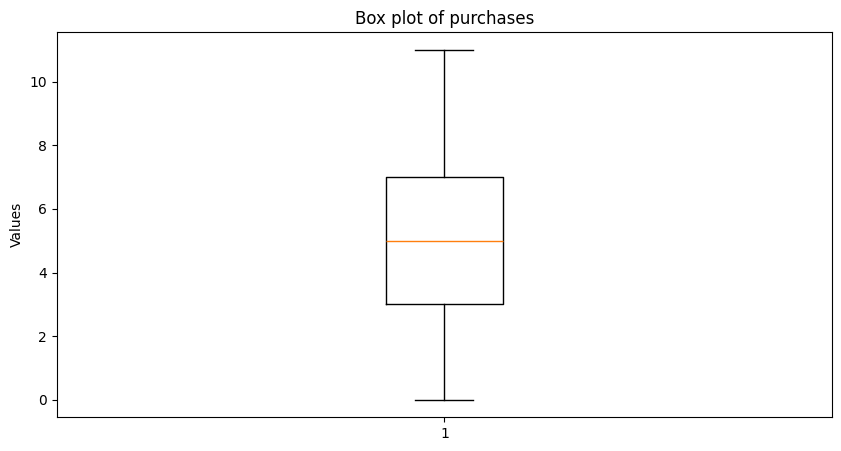

<Figure size 640x480 with 0 Axes>

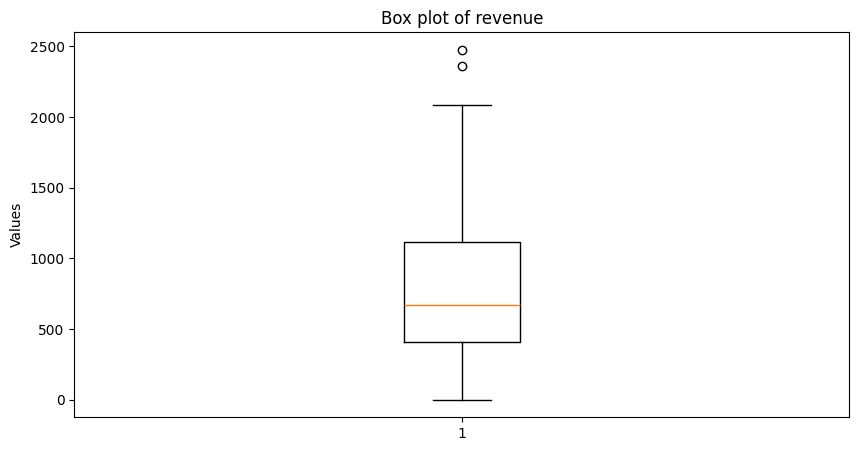

<Figure size 640x480 with 0 Axes>

In [15]:
# box plot to detect outliers (each column has its own figure)
numeric_df = dataset.select_dtypes(include=np.number)
for column in numeric_df.columns:
	fig = plt.figure(figsize=(10, 5))
	ax = fig.add_subplot(1, 1, 1)
	ax.boxplot(numeric_df[column])
	ax.set_title(f'Box plot of {column}')
	ax.set_ylabel('Values')
	plt.show()
	plt.savefig(f'figures/box_plot_{column}.png')

Прибыль возможно имеет некоторые выбросы. на которые надо обратить внимание

Text(0, 0.5, 'Revenue')

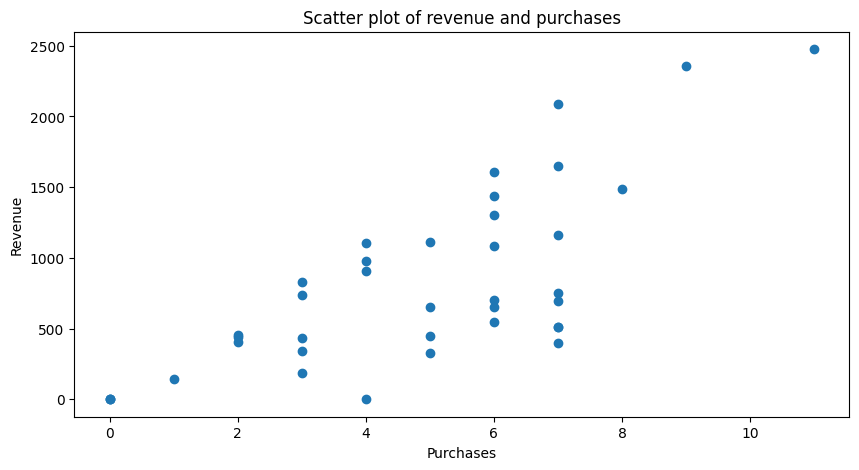

In [16]:
# scatter plot for revenue and purchases
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(dataset['purchases'], dataset['revenue'])
ax.set_title('Scatter plot of revenue and purchases')
ax.set_xlabel('Purchases')
ax.set_ylabel('Revenue')

Основное количество прибыли приходится на покупки от 4 до 8